1. XGBoost 

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\kally\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9994505925751511
Test Accuracy: 0.9934086629001884
     mean_test_score  std_test_score  \
0           0.984695        0.000769   
1           0.983832        0.000800   
2           0.985009        0.000800   
3           0.986343        0.001169   
4           0.986186        0.001110   
..               ...             ...   
238         0.992701        0.000881   
239         0.993015        0.001059   
240         0.992936        0.000693   
241         0.992936        0.001154   
242         0.993015        0.000800   

                                                params  
0    {'colsample_bytree': 0.7, 'learning_rate': 0.0...  
1    {'colsample_bytree': 0.7, 'learning_rate': 0.0...  
2    {'colsample_bytree': 0.7, 'learning_rate': 0.0...  
3    {'colsample_bytree': 0.7, 'learning_rate': 0.0...  
4    {'colsample_bytree': 0.7, 'learning_rate': 0.0...  
..                                                 ...  
238  {'colsample_bytree': 0.9, 'learning_rate': 0.2

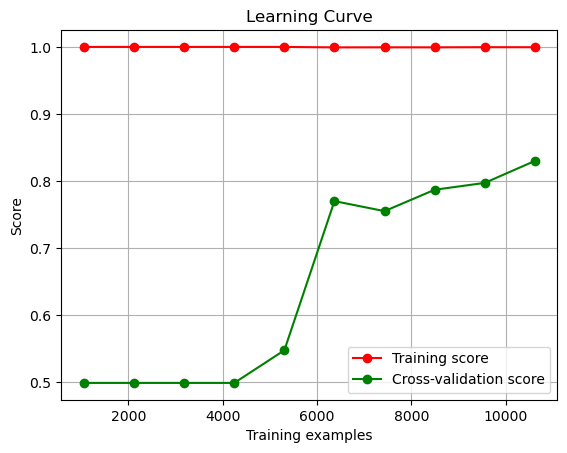

Accuracy: 0.9934086629001884
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1589
           1       0.99      0.99      0.99      1597

    accuracy                           0.99      3186
   macro avg       0.99      0.99      0.99      3186
weighted avg       0.99      0.99      0.99      3186



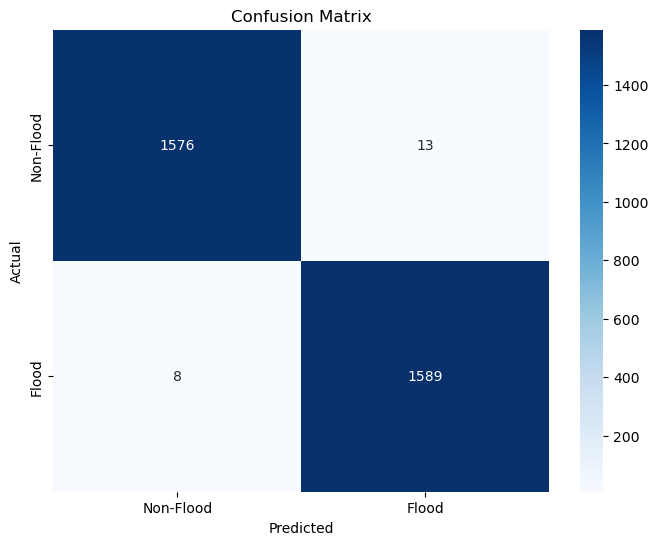

c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anacond

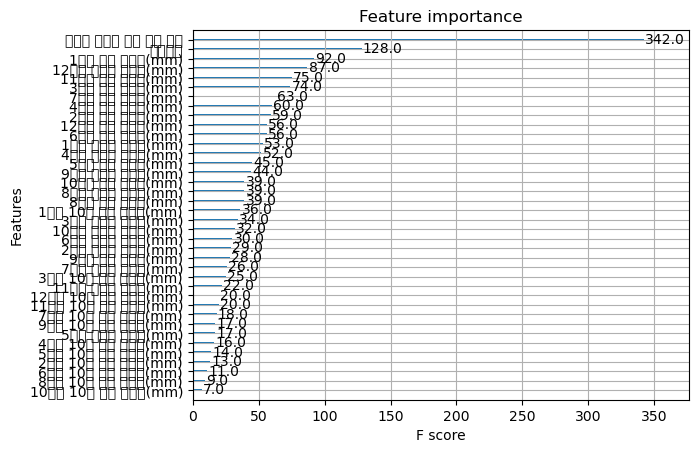

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 로드 및 전처리
non_flood_data_path = '침수가아닌날데이터.csv'
flood_data_path = '침수학습데이터.csv'

non_flood_data = pd.read_csv(non_flood_data_path)
flood_data = pd.read_csv(flood_data_path)

non_flood_data['target'] = 0
flood_data['target'] = 1

combined_data = pd.concat([non_flood_data, flood_data], ignore_index=True)

selected_columns = [
    '배수정보', '침수된 지역의 평균 지형 고도', '1시간 누적 강수량(mm)', '1시간 10분 평균 강수량(mm)', '1시간 시간당 강수량(mm)',
    '2시간 누적 강수량(mm)', '2시간 10분 평균 강수량(mm)', '2시간 시간당 강수량(mm)', '3시간 누적 강수량(mm)', '3시간 10분 평균 강수량(mm)',
    '3시간 시간당 강수량(mm)', '4시간 누적 강수량(mm)', '4시간 10분 평균 강수량(mm)', '4시간 시간당 강수량(mm)', '5시간 누적 강수량(mm)',
    '5시간 10분 평균 강수량(mm)', '5시간 시간당 강수량(mm)', '6시간 누적 강수량(mm)', '6시간 10분 평균 강수량(mm)', '6시간 시간당 강수량(mm)',
    '7시간 누적 강수량(mm)', '7시간 10분 평균 강수량(mm)', '7시간 시간당 강수량(mm)', '8시간 누적 강수량(mm)', '8시간 10분 평균 강수량(mm)',
    '8시간 시간당 강수량(mm)', '9시간 누적 강수량(mm)', '9시간 10분 평균 강수량(mm)', '9시간 시간당 강수량(mm)', '10시간 누적 강수량(mm)',
    '10시간 10분 평균 강수량(mm)', '10시간 시간당 강수량(mm)', '11시간 누적 강수량(mm)', '11시간 10분 평균 강수량(mm)', '11시간 시간당 강수량(mm)',
    '12시간 누적 강수량(mm)', '12시간 10분 평균 강수량(mm)', '12시간 시간당 강수량(mm)'
]

X = combined_data[selected_columns]
y = combined_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300]
}

# XGBoost 분류기 초기화
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

# GridSearchCV 초기화
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# GridSearchCV 수행
grid_search.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터의 성능 비교
train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# 교차 검증 결과 확인
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['mean_test_score', 'std_test_score', 'params']])

# 최적의 하이퍼파라미터와 성능
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# 학습 곡선 (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model.set_params(**grid_search.best_params_), 
    X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# 최적의 모델로 테스트 데이터 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Confusion Matrix 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Flood', 'Flood'], yticklabels=['Non-Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 피처 중요도 시각화
xgb.plot_importance(best_model)
plt.show()




#사용된 데이터 칼럼 
selected_columns = [
    '배수정보', '침수된 지역의 평균 지형 고도', '1시간 누적 강수량(mm)', '1시간 10분 평균 강수량(mm)', '1시간 시간당 강수량(mm)',
    '2시간 누적 강수량(mm)', '2시간 10분 평균 강수량(mm)', '2시간 시간당 강수량(mm)', '3시간 누적 강수량(mm)', '3시간 10분 평균 강수량(mm)',
    '3시간 시간당 강수량(mm)', '4시간 누적 강수량(mm)', '4시간 10분 평균 강수량(mm)', '4시간 시간당 강수량(mm)', '5시간 누적 강수량(mm)',
    '5시간 10분 평균 강수량(mm)', '5시간 시간당 강수량(mm)', '6시간 누적 강수량(mm)', '6시간 10분 평균 강수량(mm)', '6시간 시간당 강수량(mm)',
    '7시간 누적 강수량(mm)', '7시간 10분 평균 강수량(mm)', '7시간 시간당 강수량(mm)', '8시간 누적 강수량(mm)', '8시간 10분 평균 강수량(mm)',
    '8시간 시간당 강수량(mm)', '9시간 누적 강수량(mm)', '9시간 10분 평균 강수량(mm)', '9시간 시간당 강수량(mm)', '10시간 누적 강수량(mm)',
    '10시간 10분 평균 강수량(mm)', '10시간 시간당 강수량(mm)', '11시간 누적 강수량(mm)', '11시간 10분 평균 강수량(mm)', '11시간 시간당 강수량(mm)',
    '12시간 누적 강수량(mm)', '12시간 10분 평균 강수량(mm)', '12시간 시간당 강수량(mm)'
]



배수정보 : 배수 수준을 나타내는 척도입니다. 
XGBoost를 Decision Tree를 학습시키는 것이라고 생각해서 변수가 많은 것이 분할 조건을 많이 주는 것과 같다고 생각했습니다. 
그래서 기존 서울시에서 제공한 침수흔적도와 AWS 시간별 관측 데이터를 통해서 n시간 누적 강수량 / n시간동안의 10분당 평균 강수량 / n시간동안의 시간당 평균 강수량
이렇게 데이터 칼럼을 추가해 넣었습니다. 
그리고 2022년의 날 중 침수가 되지 않은 날짜를 랜덤으로 뽑은 뒤에 똑같은 방식으로 강수량 관련 칼럼을 추가해 넣었습니다. 

학습 결과가 오버피팅이 예상이 되는데 , 지금 추정되는 이유로는 침수가 되지 않고, 비가 많이 안오는 날이 1년 365일중 대부분이라서 
침수가 된 날과 침수가 되지 않은 날의 데이터의 차이가 크기 때문이라는 생각이 듭니다.


colsample_bytree: 0.7: 각 트리를 학습할 때 사용할 특성(피처)의 비율입니다. 전체 특성 중 70%를 무작위로 선택하여 트리를 학습시켰음을 의미합니다.
learning_rate: 0.2: 학습 속도 조절 파라미터입니다. 트리가 새로 추가될 때마다 기여도를 줄여줍니다. 0.2는 상대적으로 높은 학습률로, 모델이 빠르게 학습되었음을 나타냅니다.
max_depth: 7: 트리의 최대 깊이입니다. 트리의 깊이를 7로 설정하여 모델의 복잡도를 제어했습니다. 더 깊은 트리는 모델이 더 복잡해지고, 데이터에 더 잘 맞출 수 있지만, 오버피팅의 위험이 있습니다.
n_estimators: 100: 생성할 트리의 수입니다. 총 100개의 트리를 생성하여 모델을 학습시켰습니다.
subsample: 0.9: 각 트리를 학습할 때 사용할 데이터 샘플의 비율입니다. 전체 데이터의 90%를 사용하여 각 트리를 학습시켰습니다.

2.LightGBM 

In [1]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   --------------- ------------------------ 0.6/1.4 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00


Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\kally\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kally\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kally\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kally\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kally\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6387, number of negative: 6354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3267
[LightGBM] [Info] Number of data points in the train set: 12741, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501295 -> initscore=0.005180
[LightGBM] [Info] Start training from score 0.005180
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.7}
Best Cross-validation Accuracy: 0.9943489522015541
Accuracy: 0.9937225360954175
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1589
           1       0.99      0.99      0.99      1597

    accuracy                        

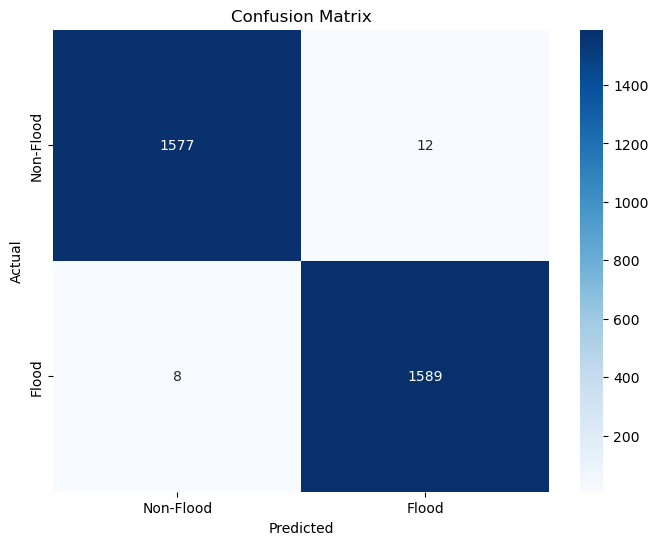

c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\

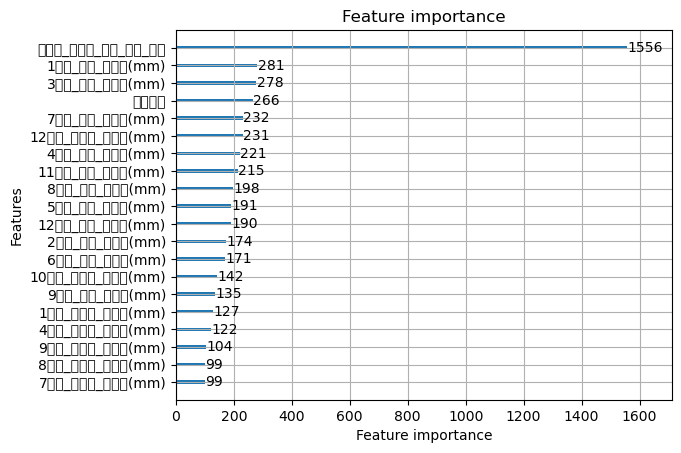

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import my_lightgbm_script as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
non_flood_data_path = '침수가아닌날데이터.csv'
flood_data_path = '침수학습데이터.csv'

non_flood_data = pd.read_csv(non_flood_data_path)
flood_data = pd.read_csv(flood_data_path)

non_flood_data['target'] = 0
flood_data['target'] = 1

combined_data = pd.concat([non_flood_data, flood_data], ignore_index=True)

selected_columns = [
    '배수정보', '침수된 지역의 평균 지형 고도', '1시간 누적 강수량(mm)', '1시간 10분 평균 강수량(mm)', '1시간 시간당 강수량(mm)',
    '2시간 누적 강수량(mm)', '2시간 10분 평균 강수량(mm)', '2시간 시간당 강수량(mm)', '3시간 누적 강수량(mm)', '3시간 10분 평균 강수량(mm)',
    '3시간 시간당 강수량(mm)', '4시간 누적 강수량(mm)', '4시간 10분 평균 강수량(mm)', '4시간 시간당 강수량(mm)', '5시간 누적 강수량(mm)',
    '5시간 10분 평균 강수량(mm)', '5시간 시간당 강수량(mm)', '6시간 누적 강수량(mm)', '6시간 10분 평균 강수량(mm)', '6시간 시간당 강수량(mm)',
    '7시간 누적 강수량(mm)', '7시간 10분 평균 강수량(mm)', '7시간 시간당 강수량(mm)', '8시간 누적 강수량(mm)', '8시간 10분 평균 강수량(mm)',
    '8시간 시간당 강수량(mm)', '9시간 누적 강수량(mm)', '9시간 10분 평균 강수량(mm)', '9시간 시간당 강수량(mm)', '10시간 누적 강수량(mm)',
    '10시간 10분 평균 강수량(mm)', '10시간 시간당 강수량(mm)', '11시간 누적 강수량(mm)', '11시간 10분 평균 강수량(mm)', '11시간 시간당 강수량(mm)',
    '12시간 누적 강수량(mm)', '12시간 10분 평균 강수량(mm)', '12시간 시간당 강수량(mm)'
]

X = combined_data[selected_columns]
y = combined_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 하이퍼파라미터 범위 설정
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# LightGBM 분류기 초기화
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)

# GridSearchCV 초기화
grid_search = GridSearchCV(
    estimator=lgb_model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# GridSearchCV 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# 최적의 모델로 테스트 데이터 예측 및 평가
best_model = grid_search.best_estimator_

# 예측 확률 계산
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# 임계값 설정
threshold = 0.9 # 예를 들어 임계값을 0.6으로 설정

# 임계값에 따라 0과 1로 분류
y_pred_threshold = (y_pred_prob >= threshold).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_threshold)
report = classification_report(y_test, y_pred_threshold)

print(f'Accuracy with threshold {threshold}: {accuracy}')
print(f'Classification Report:\n{report}')

# Confusion Matrix 시각화
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Flood', 'Flood'], yticklabels=['Non-Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold: {threshold})')
plt.show()

# 피처 중요도 시각화
lgb.plot_importance(best_model, max_num_features=20, importance_type='split')
plt.show()


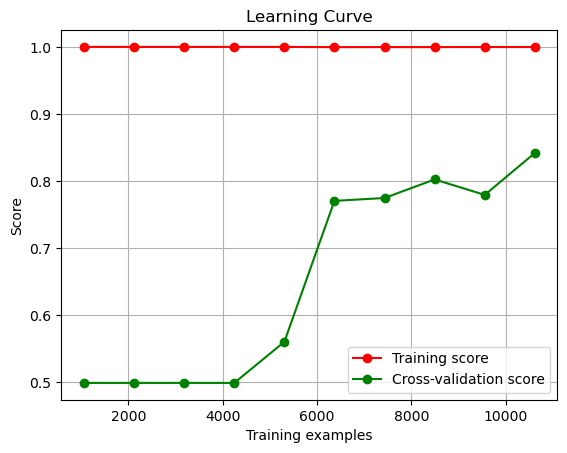

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import numpy as np
import matplotlib.pyplot as plt
# 학습 곡선 (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    lgb_model.set_params(**grid_search.best_params_), 
    X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [3]:
import joblib

# 모델 저장
model_filename = 'lightgbm_best_model.pkl'
joblib.dump(best_model, model_filename)
print(f'Model saved to {model_filename}')

# 모델 불러오기
loaded_model = joblib.load(model_filename)

# 불러온 모델로 예측 수행 (테스트 데이터)
y_loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
print(f'Loaded model accuracy: {loaded_accuracy}')

Model saved to lightgbm_best_model.pkl
Loaded model accuracy: 0.9937225360954175


In [8]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 330.3 kB/s eta 0:05:07
   ---------------------------------------- 0.1/101.1 MB 469.7 kB/s eta 0:03:36
   ---------------------------------------- 0.1/101.1 MB 585.1 kB/s eta 0:02:53
   ---------------------------------------- 0.2/101.1 MB 841.6 kB/s et

3.catboost

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best Cross-validation Accuracy: 0.9930146770269209
Accuracy with threshold 0.9: 0.9908976773383553
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1589
           1       1.00      0.98      0.99      1597

    accuracy                           0.99      3186
   macro avg       0.99      0.99      0.99      3186
weighted avg       0.99      0.99      0.99      3186



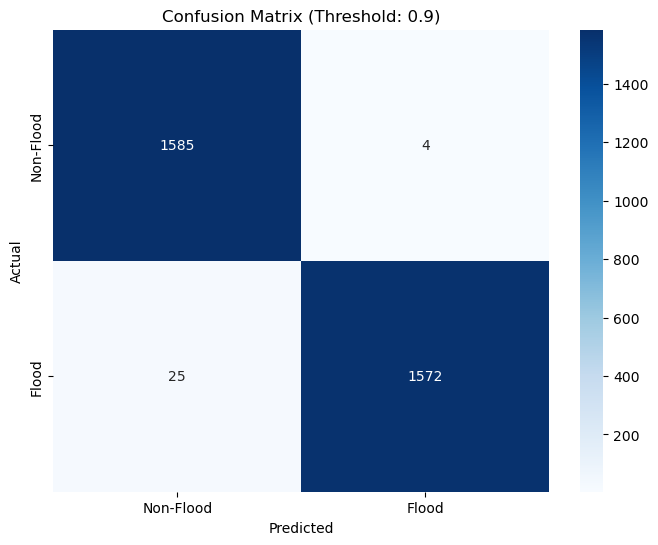

c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anacond

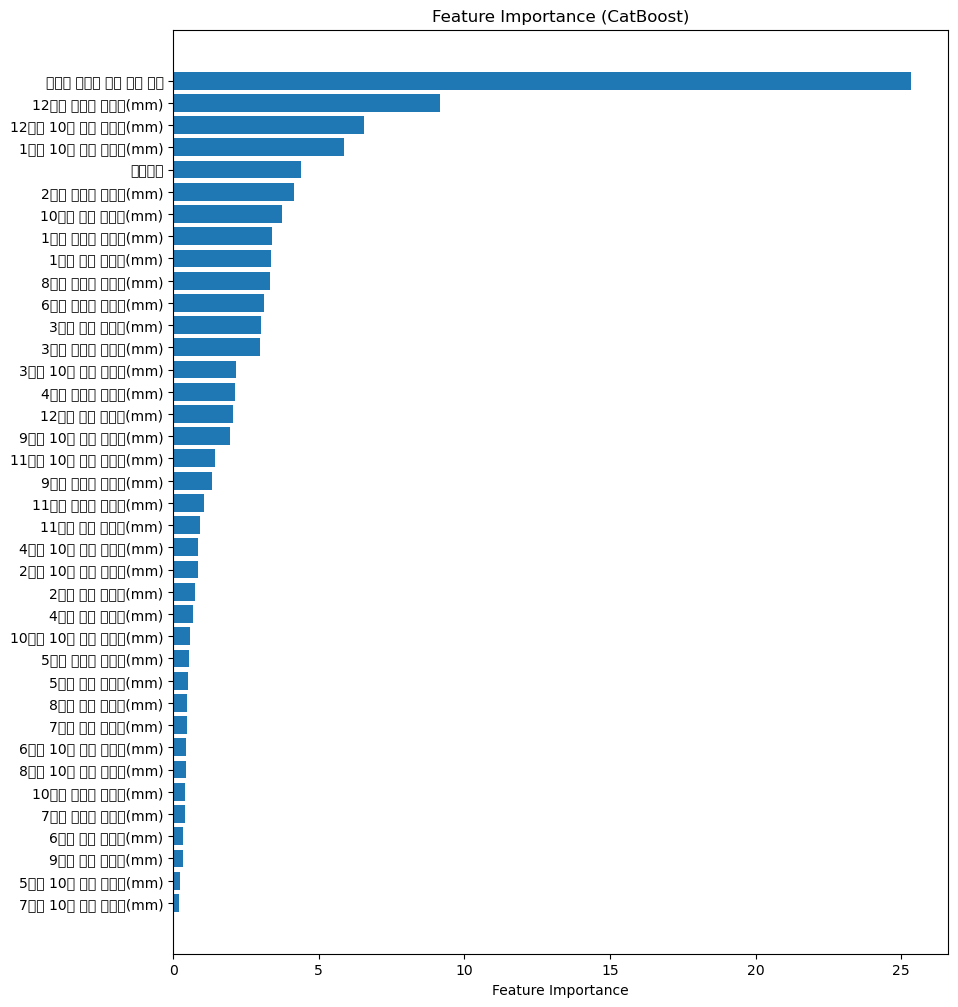

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 데이터 로드 및 전처리
non_flood_data_path = '침수가아닌날데이터.csv'
flood_data_path = '침수학습데이터.csv'

non_flood_data = pd.read_csv(non_flood_data_path)
flood_data = pd.read_csv(flood_data_path)

non_flood_data['target'] = 0
flood_data['target'] = 1

combined_data = pd.concat([non_flood_data, flood_data], ignore_index=True)

selected_columns = [
    '배수정보', '침수된 지역의 평균 지형 고도', '1시간 누적 강수량(mm)', '1시간 10분 평균 강수량(mm)', '1시간 시간당 강수량(mm)',
    '2시간 누적 강수량(mm)', '2시간 10분 평균 강수량(mm)', '2시간 시간당 강수량(mm)', '3시간 누적 강수량(mm)', '3시간 10분 평균 강수량(mm)',
    '3시간 시간당 강수량(mm)', '4시간 누적 강수량(mm)', '4시간 10분 평균 강수량(mm)', '4시간 시간당 강수량(mm)', '5시간 누적 강수량(mm)',
    '5시간 10분 평균 강수량(mm)', '5시간 시간당 강수량(mm)', '6시간 누적 강수량(mm)', '6시간 10분 평균 강수량(mm)', '6시간 시간당 강수량(mm)',
    '7시간 누적 강수량(mm)', '7시간 10분 평균 강수량(mm)', '7시간 시간당 강수량(mm)', '8시간 누적 강수량(mm)', '8시간 10분 평균 강수량(mm)',
    '8시간 시간당 강수량(mm)', '9시간 누적 강수량(mm)', '9시간 10분 평균 강수량(mm)', '9시간 시간당 강수량(mm)', '10시간 누적 강수량(mm)',
    '10시간 10분 평균 강수량(mm)', '10시간 시간당 강수량(mm)', '11시간 누적 강수량(mm)', '11시간 10분 평균 강수량(mm)', '11시간 시간당 강수량(mm)',
    '12시간 누적 강수량(mm)', '12시간 10분 평균 강수량(mm)', '12시간 시간당 강수량(mm)'
]

X = combined_data[selected_columns]
y = combined_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 하이퍼파라미터 범위 설정
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# CatBoost 분류기 초기화
cat_model = cb.CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    silent=True
)

# GridSearchCV 초기화
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# GridSearchCV 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# 최적의 모델로 테스트 데이터 예측 및 평가
best_model = grid_search.best_estimator_

# 예측 확률을 계산
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# 임계값 설정
threshold = 0.9  # 예: 임계값을 0.6으로 설정

# 임계값에 따라 0과 1로 분류
y_pred_threshold = (y_pred_prob >= threshold).astype(int)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_threshold)
report = classification_report(y_test, y_pred_threshold)

print(f'Accuracy with threshold {threshold}: {accuracy}')
print(f'Classification Report:\n{report}')

# Confusion Matrix 시각화
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Flood', 'Flood'], yticklabels=['Non-Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold: {threshold})')
plt.show()

# 피처 중요도 시각화
feature_importances = best_model.get_feature_importance()
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 12))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), [selected_columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()


c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kally\anacond

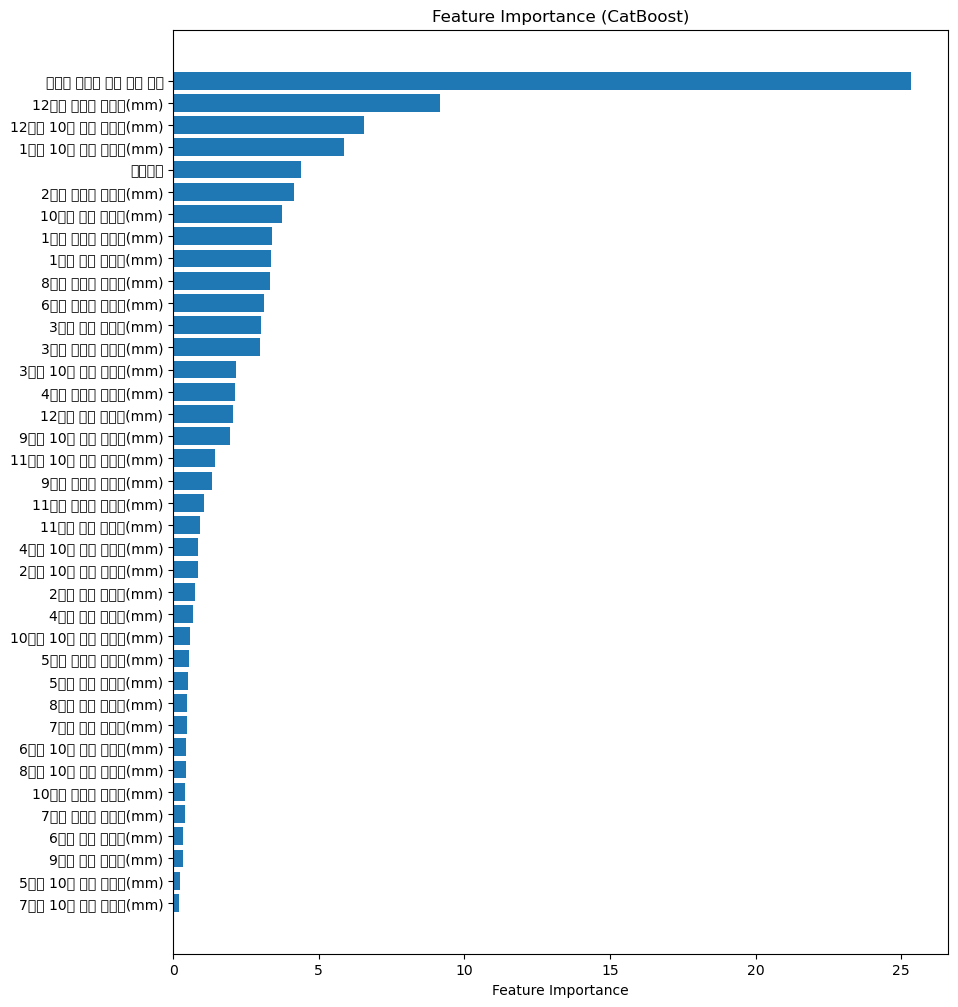

In [4]:
import numpy as np
# 피처 중요도 시각화
feature_importances = best_model.get_feature_importance()
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 12))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), [selected_columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()


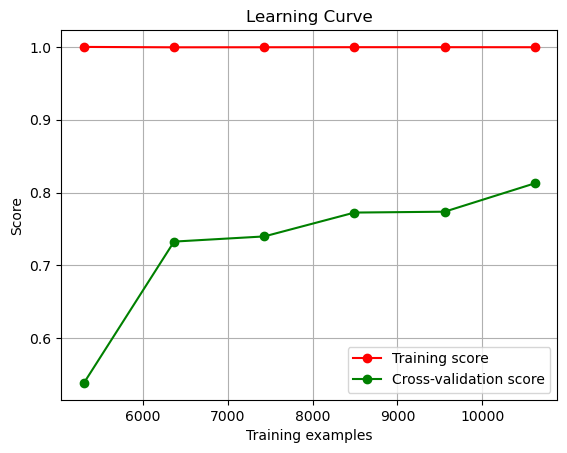

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
# 학습 곡선 (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    cat_model.set_params(**grid_search.best_params_), 
    X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [9]:
import joblib

# 모델 저장
model_filename = 'catboost_best_model.pkl'
joblib.dump(best_model, model_filename)
print(f'Model saved to {model_filename}')

# 모델 불러오기
loaded_model = joblib.load(model_filename)

# 불러온 모델로 예측 수행 (테스트 데이터)
y_loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
print(f'Loaded model accuracy: {loaded_accuracy}')

Model saved to catboost_best_model.pkl
Loaded model accuracy: 0.9934086629001884
